In [7]:
#Import the neccesary python libraries for Bayesian analysis
#and data visualisation.

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import os
import pystan as ps
import arviz as az
import statistics as Stats
import scipy.stats as stats


### https://osf.io/uszvx/ data can be dowloaded from the OSF framework. "Data_Final.csv"


In [3]:
#Use os to change working directory to import daata into jupyter for analysis
os.chdir("C:\\Users\\harri/OneDrive/Documents/OSF_Downloads")
#Read in dataframe
df = pd.read_csv("Turning_Hands_Data_Final.csv")
#Extrract neo mean scores and Rotaion socidtion for comaprison below
df_Mu_neo_condt = df[["mean_NEO", "Rotation"]]
df_Mu_neo_condt

,mean_NEO,Rotation
0,0.666667,counter
1,1.166667,clock
2,0.833333,counter
3,0.000000,clock
4,-0.250000,counter
...,...,...
97,0.083333,counter
98,1.000000,clock
99,1.333333,counter
100,0.333333,counter


In [5]:
df_counter = df_Mu_neo_condt[df_Mu_neo_condt['Rotation'].str.contains('co')]
#Extract counter clockwie groups neo means and converst into numpy array for vectorisation using python dictionary below.
counter = df_counter["mean_NEO"].to_numpy()


# Plotting histograms of the two groups data or expolratory check

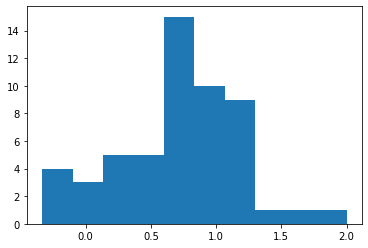

In [9]:
plt.hist(counter)
plt.show()

In [4]:
df_clock = df_Mu_neo_condt[df_Mu_neo_condt['Rotation'].str.contains('cl')]
#Extract counter clockwie groups neo means and convert into numpy array for vectorisation using python dictionary below.
clock = df_clock["mean_NEO"].to_numpy()


<function matplotlib.pyplot.show(*args, **kw)>

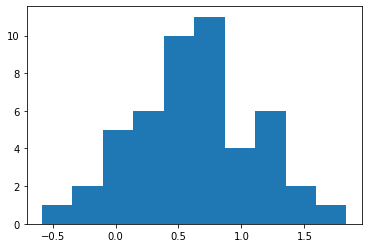

In [8]:
clock
plt.hist(clock)
plt.show

## Between subject Mean estimation in Stan. simplest model estiamting just the Means and differnce of two independent groups, with defaut priors.
### $$y_{1} \sim {\sf N(\mu)}$$ $$y_{2} \sim {\sf N(\mu)}$$$$\mu\sim U_{1}(-\infty,+\infty)$$$$\mu\sim U_{1}(-\infty,+\infty) $$







In [ ]:
#Stan model put into string to be called when the model is compiled
Model_t = """

data {
  int<lower=0> N1;  // # of observations (counter clockwise)
  int<lower=0> N2;  // # of observations (clockwise)
  vector[N1] Y1;  // Neo scores (counter clockwise)
  vector[N2] Y2;  // Neo scores (clockwise);
}

parameters {
  real<lower=-2,upper=2> mu_1;  // mean of (counter clockwise) group bounded to lower -2 and upper 2 in line with the likert
  //scale on the neo personality measure.
  real<lower=-2,upper=2> mu_2;  // mean of (clockwise) group 
  real<lower=0> sigma; // pooled standard deviation
}

model {
  Y1 ~ normal(mu_1, sigma);
  Y2 ~ normal(mu_2, sigma);
}

generated quantities {
  real cohen_d = (mu_2 - mu_1) / sigma; //effect size;
}

"""
#Cohen D being generated form the posterior samples 

In [54]:
#Create python dictionary to specify the data to be compiled using th stan coded model above 
#Should provalbly use length funtion for the N vector.
Model_t_dat = {'N1': 54 ,
               'N2': 48,
               'Y1': counter,
               'Y2': clock}

#Fit the model using 2000 sample iterations and 4 chains with the 4 cores on this machine.
#If you have more you can use more if less then use less.

fit = ps.stan(model_code = Model_t, data = Model_t_dat, iter=2000, chains=4)


INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_174c943670fada92a68398228bb462d3 NOW.


In [55]:
print(fit)

Inference for Stan model: anon_model_174c943670fada92a68398228bb462d3.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

          mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu_1      0.71  1.1e-3   0.07   0.58   0.67   0.71   0.76   0.84   3443    1.0
mu_2      0.64  1.1e-3   0.07    0.5   0.59   0.64   0.69   0.77   3847    1.0
sigma     0.49  5.7e-4   0.03   0.43   0.47   0.49   0.51   0.56   3714    1.0
cohen_d  -0.15  3.0e-3    0.2  -0.53  -0.29  -0.15  -0.02   0.23   4359    1.0
lp__      21.6    0.03   1.17  18.59  21.06  21.91  22.45  22.96   1791    1.0

Samples were drawn using NUTS at Wed Oct 21 13:58:05 2020.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


In [ ]:
# The fit object outputs of the fitted model above generates 
# the point estimates from the posterior distributon based on 
# the liklihodd and the defautlt prior.

## Arviz plotting 
### Posterior disitribution 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000027100D65AC8>,
      dtype=object)

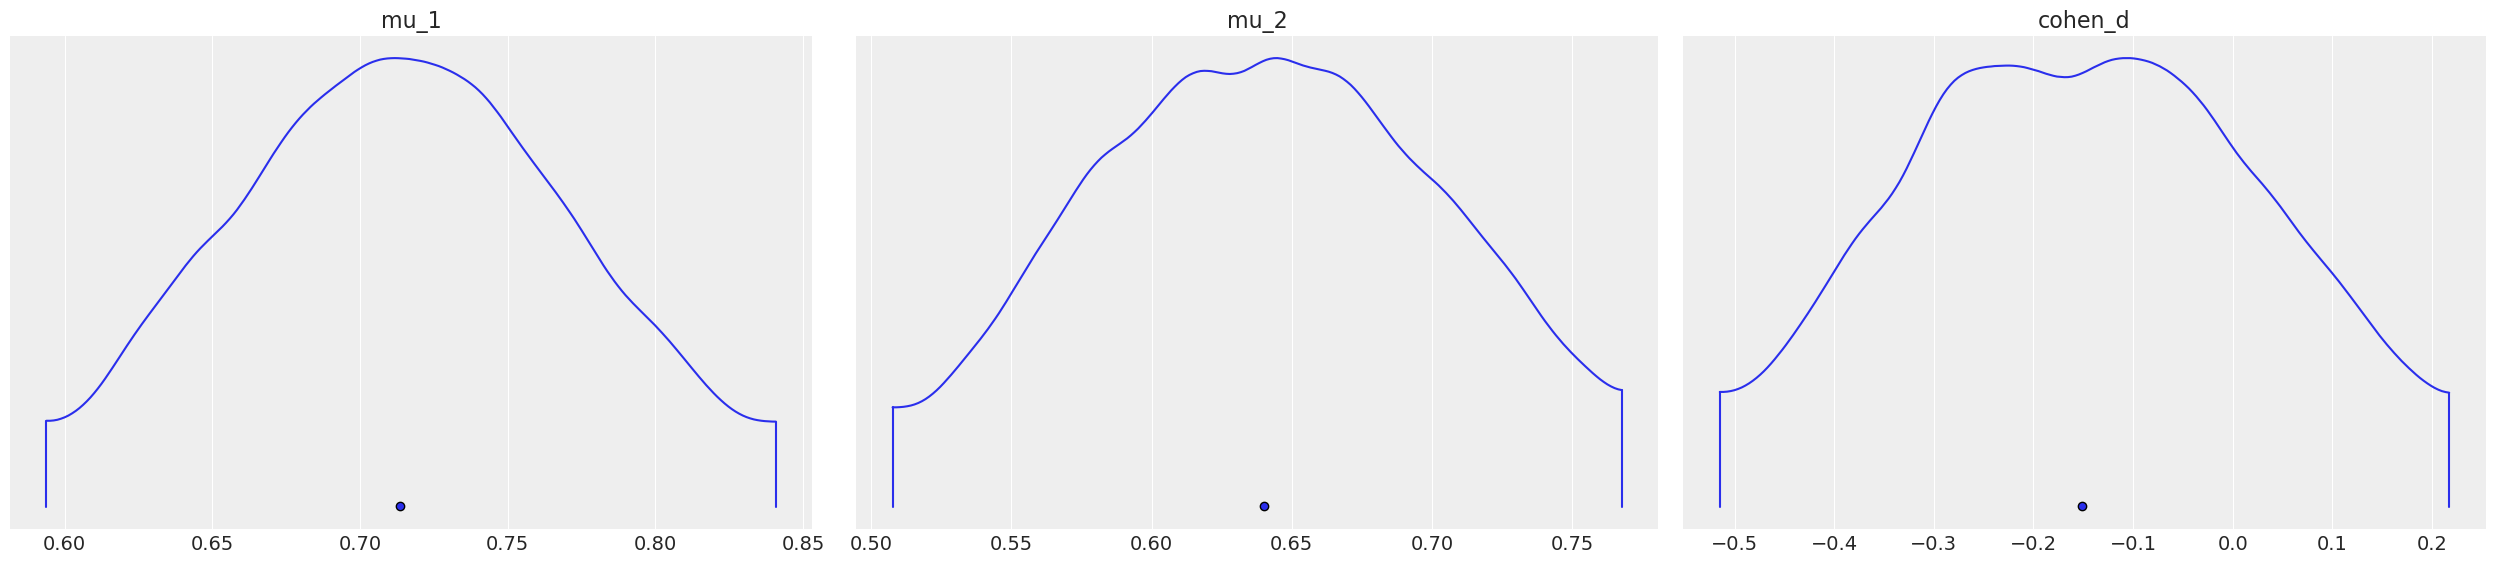

In [95]:
az.plot_density(fit, var_names=["mu_1", "mu_2","cohen_d"])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027100AC6048>,
      dtype=object)

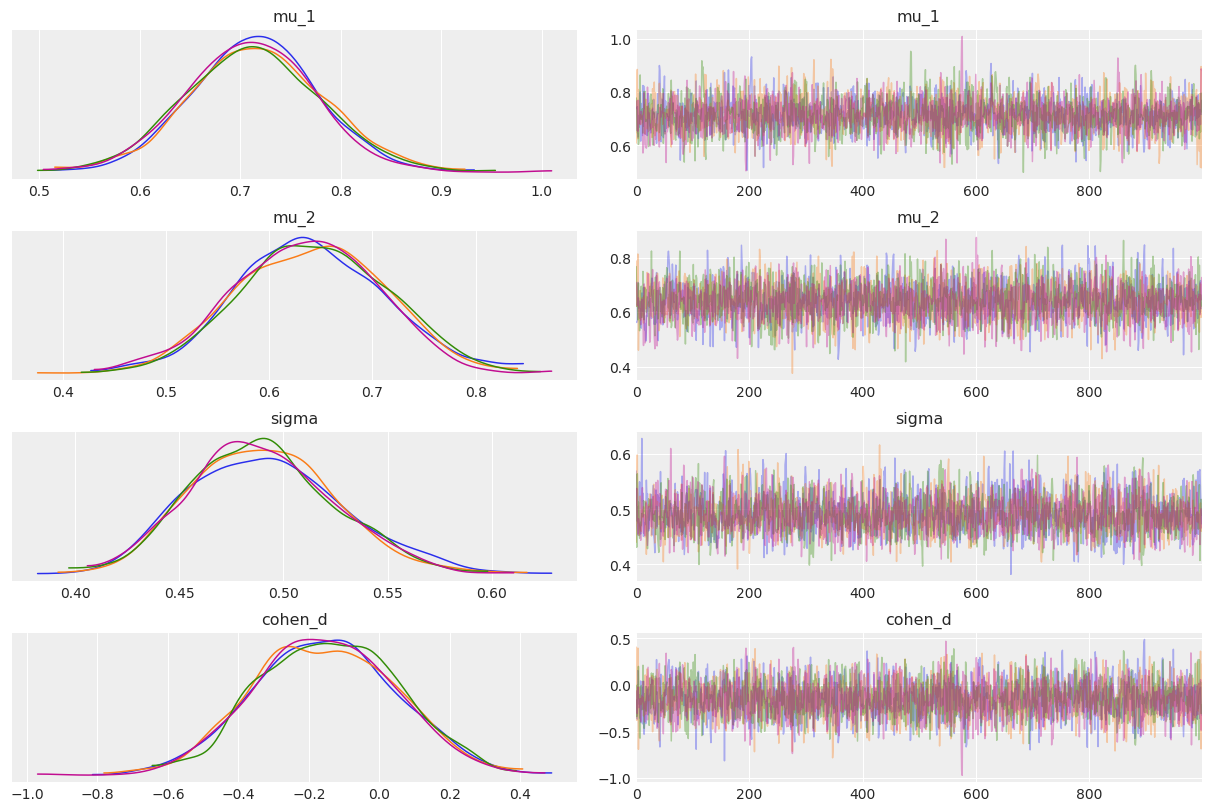

In [94]:
az.plot_trace(fit)
#Trace plots show the chain have mixed welland based on the Rhat diagnostic have also Converged

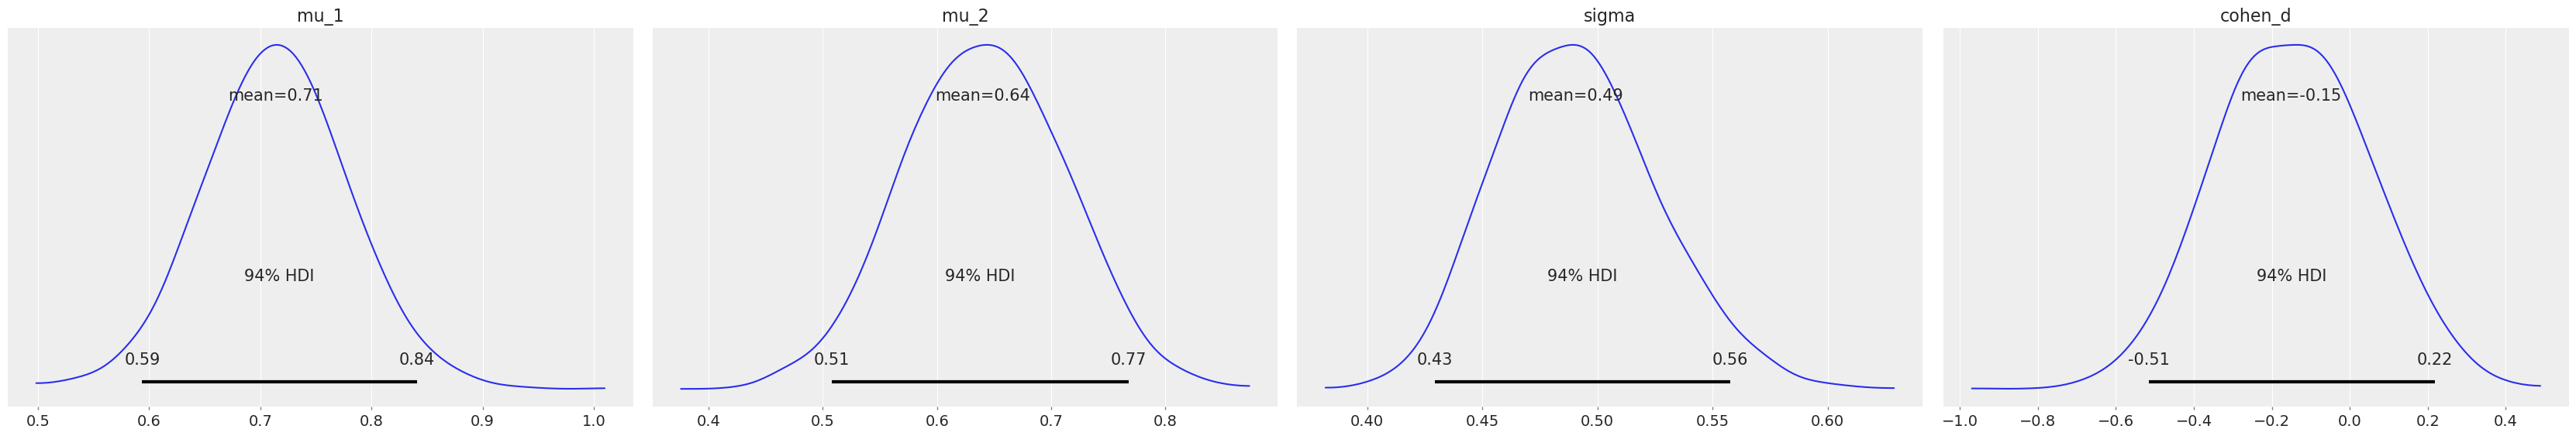

In [91]:
az.plot_posterior(fit);
#The posterior plots show the  94% credible interval of the estimated posterior disitributions
#for the means, pooled standard deviations(estimated on only for the cohen d calcuation). The cohen d standardised mean difference if the st 
#interesting for infernces in the standard framework of decion mking of a decion of meaningful differnce
#Kruskche (2011) as while the point estimate suggests a diffenece, the credible interval spans across zero 
#so the diffence could reasonalbe be credible in either direction.